# Spam Classification using Machine Learning

This code demonstrates the process of building a spam classification model using machine learning techniques. The key steps involved are:

1. **Data Preprocessing**:
   - Importing necessary libraries and downloading NLTK resources.
   - Reading the spam dataset from a CSV file.
   - Cleaning and lemmatizing the text data using regular expressions and the NLTK WordNetLemmatizer.
   - Generating word clouds for ham (non-spam) and spam messages to visualize the most frequent words.

2. **Feature Extraction and Model Training**:
   - Creating the feature (X) and target (y) variables from the cleaned text and labels.
   - Splitting the data into training and testing sets.
   - Vectorizing the text data using the CountVectorizer from scikit-learn.
   - Training a Multinomial Naive Bayes classifier and evaluating its performance using accuracy, classification report, and confusion matrix.
   - Training a Support Vector Machine (SVM) classifier and evaluating its performance using the same metrics.

3. **Model Evaluation and Comparison**:
   - Comparing the performance of the Naive Bayes and SVM classifiers.
   - Visualizing the confusion matrices for both models to understand their classification errors.

The code demonstrates the end-to-end process of building a spam classification model, including data preprocessing, feature engineering, model training, and evaluation. The use of Naive Bayes and SVM classifiers, along with the visualization of results, provides a comprehensive approach to spam detection using machine learning.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# downloading packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/mac/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# importing dataset
df = pd.read_csv("Downloads/spam.csv", encoding='iso-8859-1')

In [4]:
#printing few observations
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#creating a new dataframe for v1 and v2
df = df[['v1', 'v2']]

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#showing the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
#checking for null
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
#checking the shape of the dataset
df.shape

(5572, 2)

In [10]:
#counting the value of v1
value_counts = df['v1'].value_counts()

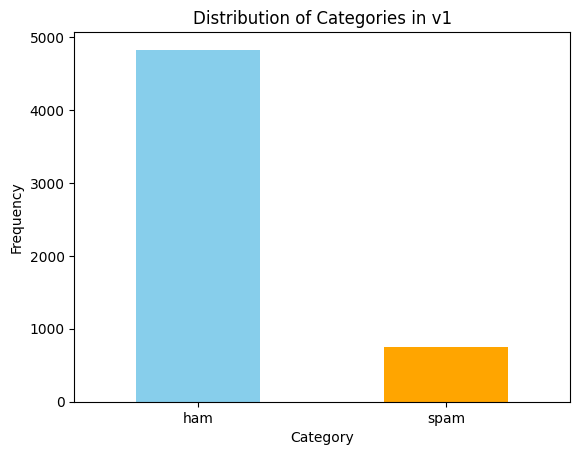

In [11]:
# Plot the value counts as a bar chart
value_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Categories in v1')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [12]:
#printing the value counts
value_counts

v1
ham     4825
spam     747
Name: count, dtype: int64

In [13]:
# Calculating the average length of spam and ham messages
df['Message_Length'] = df['v2'].apply(len)
average_length = df.groupby('v1')['Message_Length'].mean()
print(average_length)

v1
ham      71.023627
spam    138.866131
Name: Message_Length, dtype: float64


<Figure size 1000x600 with 0 Axes>

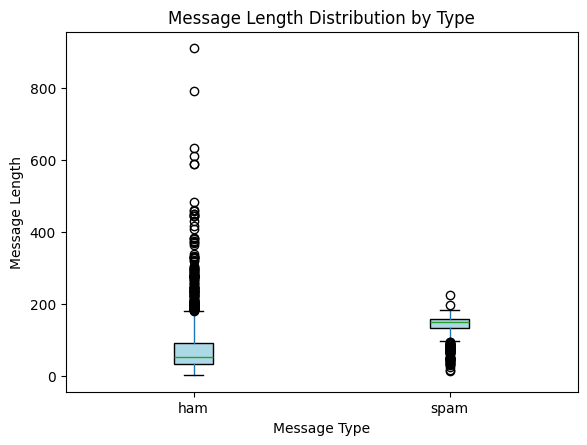

In [14]:
# Ploting the distribution of message lengths for spam and ham messages
plt.figure(figsize=(10, 6))
df.boxplot(column='Message_Length', by='v1', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Message Length Distribution by Type')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Message Type')
plt.ylabel('Message Length')
plt.show()

## Pre Processing

In [15]:
#Initializing the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# Defining a function to clean and lemmatize the text
def clean_and_lemmatize_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords and lemmatize
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
    return text

# Applying the clean_and_lemmatize_text function to the 'v2' column using .loc to avoid SettingWithCopyWarning
df.loc[:, 'cleaned_text'] = df['v2'].apply(clean_and_lemmatize_text)

# Displaying the first few rows of the DataFrame to see the cleaned and lemmatized text
df[['v1','v2', 'cleaned_text']].head()


,v1,v2,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


# Word Cloud for Ham Messages

In [16]:
ham_messages = ' '.join(df[df['v1'] == 'ham']['cleaned_text'])

(-0.5, 799.5, 399.5, -0.5)

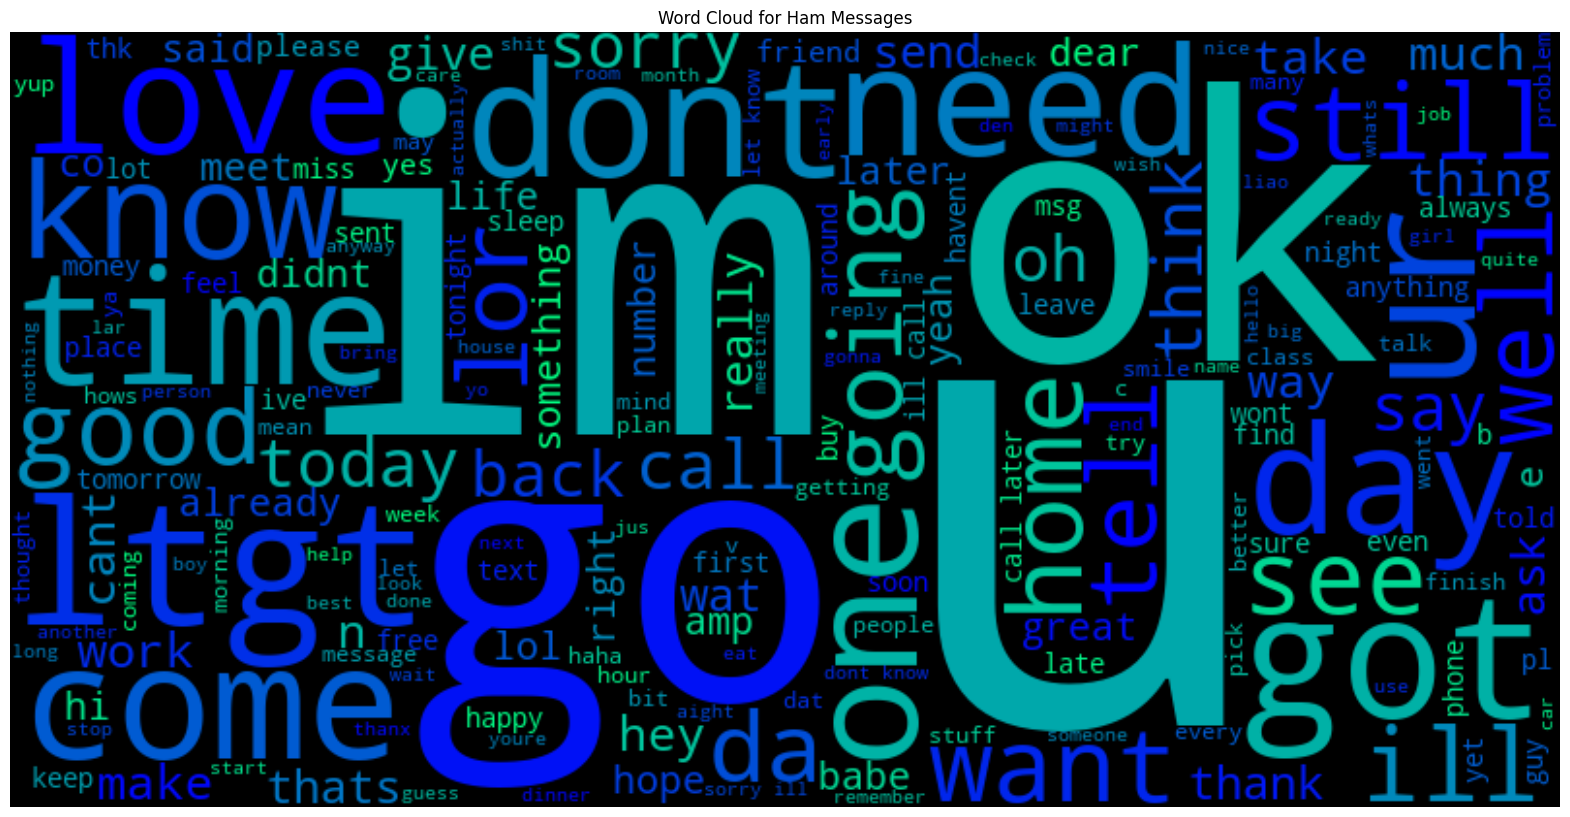

In [17]:
wordcloud_ham = WordCloud(width=800, height=400, background_color='black', colormap='winter').generate(ham_messages)
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')

# Word Cloud for Spam Messages

In [18]:
spam_messages = ' '.join(df[df['v1'] == 'spam']['cleaned_text'])

Text(0.5, 1.0, 'Word Cloud for Spam Messages')

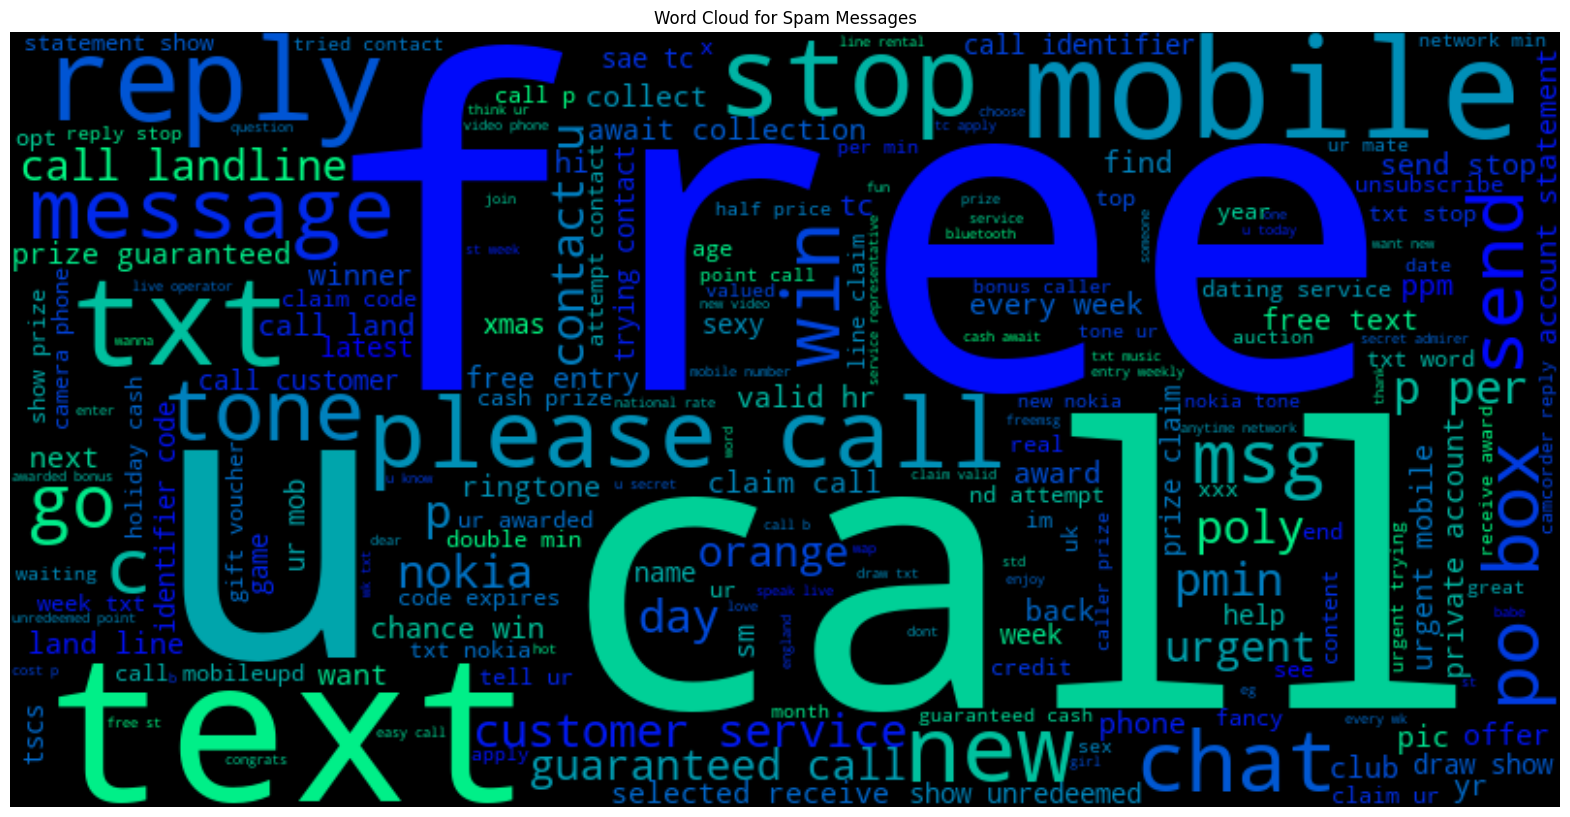

In [19]:
wordcloud_spam = WordCloud(width=800, height=400, background_color='black', colormap='winter').generate(spam_messages)
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')

In [20]:
# Creating X (features) and y (target) variables
X = df['cleaned_text']
y = df['v1']

# Display shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (5572,)
Shape of y: (5572,)


Number of unique words: 7878


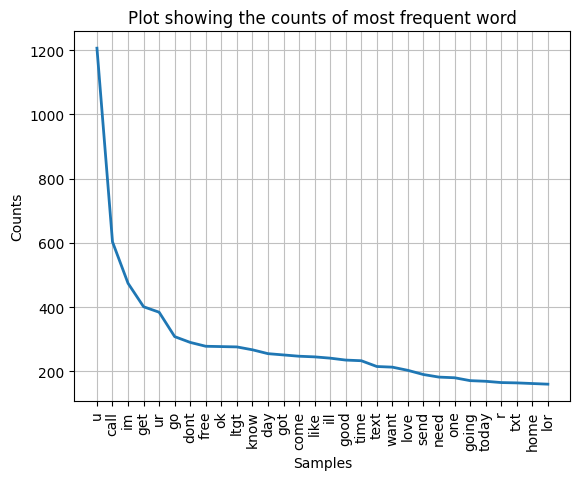

In [21]:
#Plot showing the counts of most frequent word
all_text = ' '. join(X)
tokens = word_tokenize(all_text)
freq_dist = FreqDist(tokens)
unique_word_count = len(freq_dist)
print(f"Number of unique words: {unique_word_count}")
freq_dist.plot(30, cumulative = False, title = 'Plot showing the counts of most frequent word')
plt.show()

In [22]:
# encoding the target variables
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#counts of most common 10 words
all_text = ' '. join(X)
tokens = word_tokenize(all_text)
freq_dist = FreqDist(tokens)
print(freq_dist.most_common(10))

[('u', 1206), ('call', 603), ('im', 474), ('get', 401), ('ur', 384), ('go', 308), ('dont', 290), ('free', 278), ('ok', 277), ('ltgt', 276)]


In [24]:
# Vectorizing the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Training a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_vec)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Classification Report:\
', report)

Accuracy: 0.9802690582959641
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.89      0.92       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



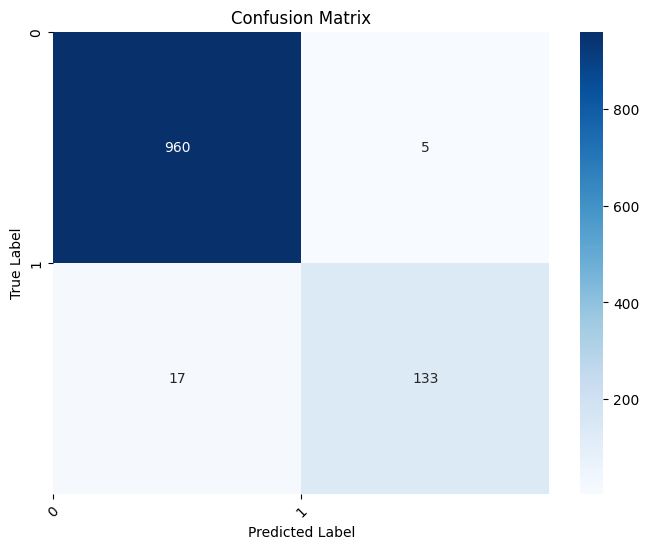

In [25]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Setting labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Setting tick labels for x and y axes
tick_marks = range(len(set(y)))
plt.xticks(tick_marks, set(y), rotation=45)
plt.yticks(tick_marks, set(y))

# Displaying the plot
plt.show()


In [26]:
# Training a Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vec, y_train)

# Making predictions on the test set
y_pred_svm = svm_model.predict(X_test_vec)

# Evaluating the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print('SVM Accuracy:', accuracy_svm)
print('SVM Classification Report:\
', report_svm)

SVM Accuracy: 0.9748878923766816
SVM Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.85      0.90       150

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



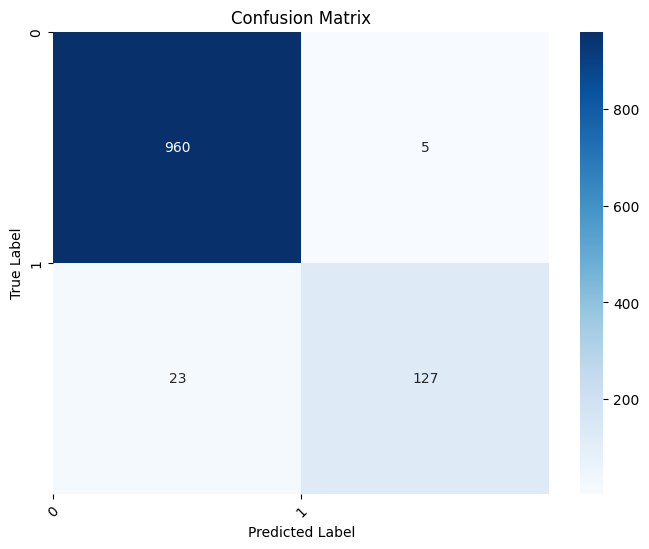

In [27]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Setting labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Setting tick labels for x and y axes
tick_marks = range(len(set(y)))
plt.xticks(tick_marks, set(y), rotation=45)
plt.yticks(tick_marks, set(y))

# Displaying the plot
plt.show()

Both models perform very well, with the Naive Bayes classifier having a slightly higher accuracy. The precision, recall, and F1-score for both models are also high, with the Naive Bayes model performing slightly better on the spam class.